In [65]:
from ipstartup import *
croot = "c:" if os.name=="nt" else "/mnt/c"
droot = "d:" if os.name=="nt" else "/mnt/d"
os.chdir(f"{droot}/data1")
sys.path.append(f"{croot}/Users/simon/OneDrive/Documents/py/live/slab")
############################################################################
from transformers import pipeline
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
model = "nbroad/ESG-BERT"
feature_extraction = pipeline('feature-extraction', model=model)

[defaultlog:22:INFO]:logging started from /mnt/c/users/simon/onedrive/documents/py/live/pyutils/defaultlog.py (time=Jul-06 11:37 MainProcess)


Some weights of the model checkpoint at nbroad/ESG-BERT were not used when initializing BertModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [66]:
sents = pd.read_csv("Clean_sentences.csv")
sents = sents.Sentences.tolist()
kpis = pd.read_excel("GRI KPI list.xlsx", sheet_name="Generic KPI List").KPI.tolist()

[cellevents:43:INFO]:starting (time=Jul-06 11:38 MainProcess)


time: 1.05 s


In [69]:
import re

def get_ngrams(s, maxn=999):
    s = s.lower()
    s = re.sub(r'[^a-zA-Z0-9\s]', ' ', s)
    tokens = [token for token in s.split(" ") if token != ""]
    ngrams = []
    for start in range(len(tokens)):
        for end in range(start, len(tokens)):
            if end+1-start > maxn:
                break
            ngram = " ".join(tokens[start:end+1])
            ngrams.append(ngram)
    return list(set(ngrams))

def get_feat(sents):
    """ return list of sent*features"""
    word_features = feature_extraction(sents)
    sent_features = [np.array(x).mean(axis=1) for x in word_features]
    features = [x[0] for x in sent_features]
    return features

[cellevents:43:INFO]:starting (time=Jul-06 11:39 MainProcess)


time: 2.91 ms


In [119]:
kpi_feat = get_feat(kpis)

[cellevents:43:INFO]:starting (time=Jul-06 12:05 MainProcess)


time: 4.05 s


# sentence embedding (mean)

In [155]:
best = []
for i, sent in enumerate(tqdm(sents)):
    sent_feat = get_feat([sent])
    res = cosine_similarity(sent_feat, kpi_feat)
    ix = np.unravel_index(res.argmax(), res.shape)
    best.append([kpis[ix[1]], res.max()])
sentdf = pd.DataFrame(best, index=sents, columns=["kpi", "score"])
sentdf.to_pickle("sentdf")

[cellevents:43:INFO]:starting (time=Jul-06 15:59 MainProcess)


  0%|          | 0/126 [00:00<?, ?it/s]

time: 20.5 s


# ngram embedding

In [135]:
best = []
for i, sent in enumerate(tqdm(sents)):
    ngrams = get_ngrams(sent, 5)
    ngram_feat = get_feat(ngrams)
    res = cosine_similarity(ngram_feat, kpi_feat)
    ix = np.unravel_index(res.argmax(), res.shape)
    best.append([ngrams[ix[0]], kpis[ix[1]], res.max()])

[cellevents:43:INFO]:starting (time=Jul-06 12:36 MainProcess)


  0%|          | 0/126 [00:00<?, ?it/s]

time: 28min 23s


In [136]:
ngramdf = pd.DataFrame(best, index=sents, columns=["ngram", "kpi", "score"])
ngramdf.to_pickle("ngramdf")

[cellevents:43:INFO]:starting (time=Jul-06 13:05 MainProcess)


time: 135 ms


[cellevents:43:INFO]:starting (time=Jul-06 13:06 MainProcess)


<AxesSubplot:>

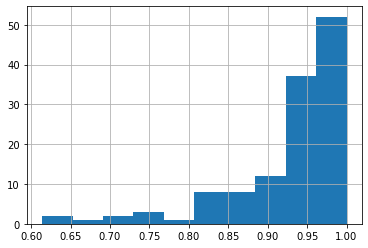

time: 970 ms


In [140]:
ngramdf.score.hist()

In [144]:
ngramdf.sort_values("score")[:25]

[cellevents:43:INFO]:starting (time=Jul-06 13:08 MainProcess)


,ngram,kpi,score
"to reduce our environmental footprint, we utilise 7d virtual design construction (vdc), system formwork and industrialised building system (ibs), all of which help to reduce construction waste**.",and industrialised building system,non-renewable materials,0.613924
"taken together, these measures help us reduce the carbon_footprint of our glazed balconies by 30 percent -from 5,000 kg co, to 3,500 kg co,e-while also reducing the repayment period on the climate debt.",these measures help us reduce,community investments,0.633973
"taking the tolerance values of the measuring system as a reference, it is estimated that they have managed to reduce the emission between 50% and 60%, which would be equivalent to more than 4,000 tonnes of co2.",a reference it is estimated,Corporate income tax,0.672083
tree planting can help cool down cities by as much as 15c depending on the latitude-a small tree of not more than four meters tall is able to provide about 6 kw of cooling.,about 6 kw of cooling,energy consumption,0.694526
"instead of disposing of the oil after first use, we filter the used oil and use it for topping up, a:: transforming our portfolios to low-carbon sustainable cities which reduces the amount of new oil required.",and use it for topping,products purchased locally,0.697055
"in fye 2020, it reduced steam use by 44%, equivalent to 1,089 metric tons of co,.",2020 it reduced steam use,energy consumption,0.751916
"the initiative also demands footprint and yn sd th decentralises farming by ensuring every urban farm is within 5 km of the local_communities, reducing the food miles higher yield distance from farm to plate and eventually lowering consumers carbon_footprint.",local communities,human rights policies,0.752320
"for the 2020-2024 period, the company has set itself the new challenge of increasing its installed capacity by nearly 50%, adding 5,000 renewable mw to its current figures.",renewable,renewable materials,0.764430
the amount of fossil-based electricity has been reduced by 91 percent since 2015.,amount of fossil based electricity,energy consumption,0.803722
"our strategic partnership with goodfuels/wartsila led to our boskalis on bio program, which delivered a world first for us when our willem van oranje became the first dredging vessel in the world to operate on 100% bio-fuel oil, allowing a 90% carbon reduction.",fuel oil allowing a 90,fuel consumption,0.812367


time: 27.4 ms


In [166]:
out = ngramdf.join(sentdf, rsuffix="_sent")[["ngram", "kpi", "kpi_sent", "score", "score_sent"]]
out.to_excel("sent_ngram.xlsx")
out

[cellevents:43:INFO]:starting (time=Jul-06 16:08 MainProcess)


,ngram,kpi,kpi_sent,score,score_sent
62.2% use of electricity from renewable_sources achieved and total energy consumption from fossil fuel sources reduced by 86% compared to 2017.,energy consumption,energy consumption,energy consumption,1.000000,0.896014
"at present, the energy expenditure has been reduced by 15%.",energy expenditure has been reduced,energy consumption,energy consumption,0.886369,0.820542
170 business leaders call on eu decision-makers to support a greenhouse gas (ghg) emissions reduction target of at least 55% by 2030.,ghg emissions,GHG emissions,GHG emissions,1.000000,0.911156
"taking the tolerance values of the measuring system as a reference, it is estimated that they have managed to reduce the emission between 50% and 60%, which would be equivalent to more than 4,000 tonnes of co2.",a reference it is estimated,Corporate income tax,GHG emissions,0.672083,0.450366
"with the help of energy management, the division aims to reduce energy consumption by 1000 mwh compared to the 2020 financial year.",energy consumption,energy consumption,energy consumption,1.000000,0.891604
...,...,...,...,...,...
"a forest plantation managed by new forests in australia our company-owned forests, mitsuis forests, absorb and fixate 160,000 tons of carbon dioxide annually it is estimated that the carbon dioxide absorbed and fixated by mitsuis forests amounts to approximately 160,000 tons per year, and co2 accumulation has reached approximately 10 million tons*'.",owned forests mitsuis forests,protected habitat areas,GHG emissions,0.842291,0.602311
"waste_reduction, recycling business initiatives relating to a circular economy 3r design, reduce our partner gestamp automocidn s.a. contributes to energy_efficiency improvement of vehicles on a global basis by designing and supplying light weight parts that are 100% recyclable.",energy efficiency,energy consumption,non-renewable materials,0.942913,0.660365
"waste_reduction: 71,670 tons/year sugar cane residue (bagasse) from a sugar manufacturing business operated jointly by mitsui and mitsui sugar co. in thailand is used as fuel for biomass power generation, and the electric power is used for the operation of its plants with surplus electric power being sold, contributing to an increase in the use of renewable_energy in thailand.",use of renewable energy in,energy consumption,energy consumption,0.872657,0.667060
the amount of fossil-based electricity has been reduced by 91 percent since 2015.,amount of fossil based electricity,energy consumption,energy consumption,0.803722,0.765618


time: 98.9 ms


# multi-kpi per sentence

In [147]:
res = cosine_similarity(get_feat(sents), get_feat(kpis))
df = pd.DataFrame(res, index=sents, columns=kpis)

[cellevents:43:INFO]:starting (time=Jul-06 15:52 MainProcess)


time: 30.7 s


In [ ]:
df.index.name = "sent"
df2 = sentdf.melt(ignore_index=False).reset_index()
df2 = df2.sort_values("value", ascending=False)
df2 = df2.groupby("sent").head(1)
df2 = df2[df2.value>.5]
df2 = df2.sort_values(["sent", "value"], ascending=False)
df2 = df2.set_index("sent")
df2.columns = ["kpi", "score"]
df2

# speed check

In [ ]:
### batching makes little difference to time. maybe does on gpu?

In [116]:
sent_feats = get_feat(sents)

[cellevents:43:INFO]:starting (time=Jul-06 12:02 MainProcess)


time: 20.7 s


In [118]:
sent_feats = []
for sent in sents:
    sent_feat = get_feat(sent)
    sent_feats.append(sent_feat)

[cellevents:43:INFO]:starting (time=Jul-06 12:03 MainProcess)


time: 18.4 s
